<a href="https://colab.research.google.com/github/hyonnys/tp1/blob/main/AIB_TP1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **< EDA 결과 SUMMARY >**<br>

### **1. 모델 상용화 가치**<br>
- 수출량 상위 수산식품
- 장식품 생산 (진주, 자개)
- 친환경 재활용 기술 개발
> 🔎 수명 예측으로 번식 증가 가능성<br>
🔎 수명 예측으로 양식장 환경 유지 비용 감소 가능성<br>
🔎 수명 예측으로 장식품 품질 향상 가능성<br>
🔎 수명 예측으로 전복 먹이 사슬에 대한 해양생태계 안정화<br>
❗수명 예측 결과와의 연관성에 대한 추가 조사 필요
<br>

### **2. 모델 성능 고도화**<br>
- 코드 리펙터링
  - 활용할 라이브러리 결정
  - 코드 간결화: 리스트컴프리헨션 및 파이썬 메서드 활용
- Data Engineering
  + 충분한 양의 데이터 확보 - 전이 학습법 활용?
  + 타겟 데이터 불균형 확인 - 분포 확인
  + 정보 누수 확인 - 상관관계 확인 결과, 누수 없음
- Model Engineering
  + Baseline
    + 에폭, 미니배치, 은닉계층 깊이와 노드 수
    + 편향 경사하강법 사용
  - 고도화된 모델
    + 성능 **평가지표 기준** 세우기
    + **미니배치 경사하강법** (iteration마다 N개의 배치 사이즈 데이터를 사용한다)
    + 다변수의 기울기 계산할 때에, 경사하강법의 비용이 커지므로 비효율적이다. 따라서 **오차역전파법**을 사용한다.
    - 오차역전파법(backpropagation)은 경사하강법의 미분계산 대신 수열의 점화식을 사용한다.
<br>

### **3. 모델 배포**<br>
- Web APP 구현
  + 데이터 입력 페이지
  + 수명 예측 결과 출력 페이지
<br>

### **4. 차후 To-do**<br>
📌_도메인 조사 결과 정리_<br>
📌 _Baseline 코드 탐색 및 이해_<br>
📌 _성능 고도화 작업_<br>

# **Feature Details** <br>
+ **Sex** - Female(암컷), Male(수컷), Infant(어린 전복)
+ **Length** - 껍데기의 최대 길이 (mm)
+ **Diameter** - 두께? (mm) perpendicular to length
+ **Height** - 총 길이 (mm)
+ **Whole_weight** - 총 무게 (g)
+ ** Shucked_weight** - 전복살 무게 (g)
+ **Viscera_weight** - 내장 무게 (g)
+ **Shell_weigth** - 껍질 무게 (g)
+ _**Rings** - 수명 (TARGET)_
<br>


# **Part 1. 탐색**<br>
### **1-1. 품질** <br>
_Task_ <br>
- 중복/결측/부정확 데이터 확인 필요<br>

_Result_
- 중복 및 결측 데이터 없음.
- 부정확 데이터 세부 확인 필요.
<br>
<br>

### **1-2. 구조** <br>
_Task_
> 1) 각 변수(variable)는 하나의 열(column)을 구성  
2) 각 관측치(observation)는 하나의 행(row)을 구성  
3) 각 유형의 관측 단위가 표를 구성

_Result_ <br>
- 위의 경우에 해당되지 않음.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
abalone = pd.read_csv('/content/drive/MyDrive/regression_data.csv')
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [6]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [7]:
abalone.duplicated().sum()

0

### **1-3. 특성별 부정확 데이터 및 분포 확인**

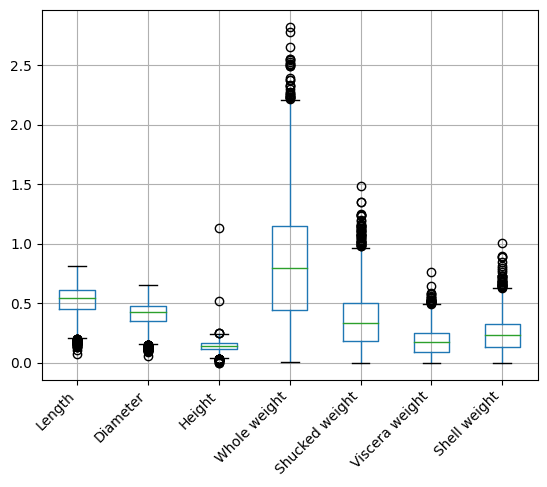

In [24]:
abalone_x = abalone.drop(columns='Rings')
abalone_x.boxplot()
plt.xticks(rotation=45, ha='right');

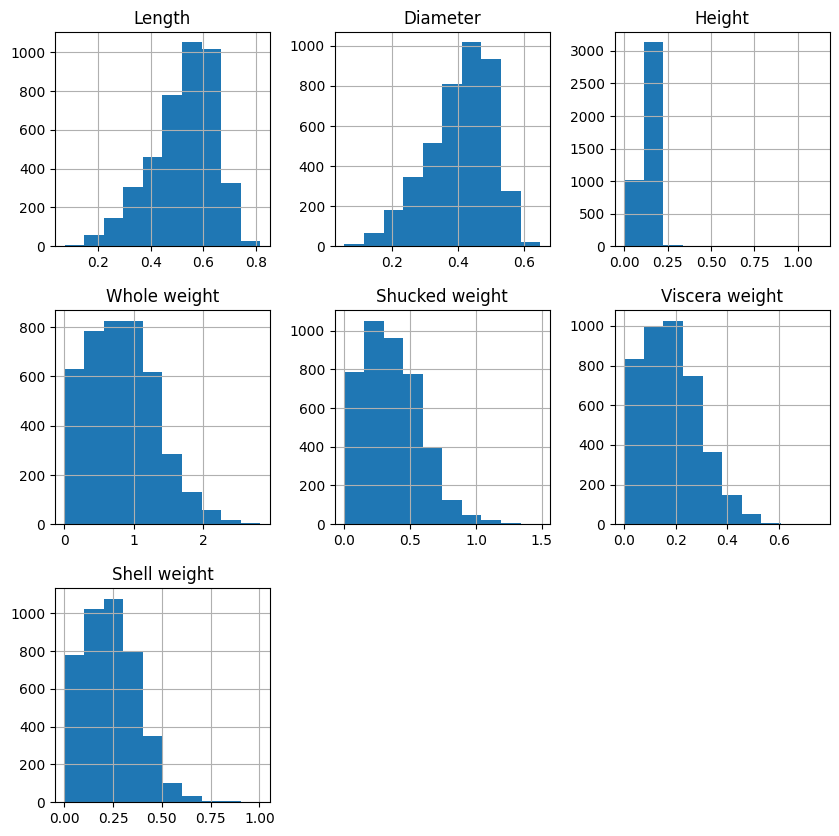

In [25]:
abalone_x.hist(figsize=(10,10));

### **1-4. 종속 변수 부정확 데이터 및 분포 확인**

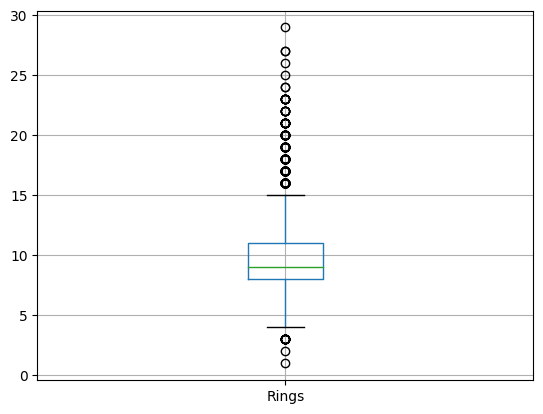

In [31]:
abalone[['Rings']].boxplot();

In [40]:
abalone['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64

<ipython-input-35-998137354f39>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(abalone['Rings']);


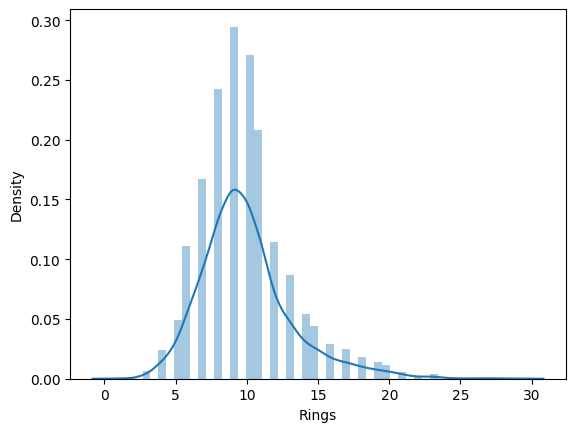

In [35]:
sns.distplot(abalone['Rings']);

# **Part 2. Business Insight** <br>
### **2-1. 전복 수명 예측 필요성**<br>
> - 전복은 국내에서 생산되는 **수산식품 中 수출량이 5위**에 달하며, 전복 **수출 상위 10개국 中 한국은 3위**를 기록하고 있다.
- 전복은 식품으로써의 가치만 있는 것이 아니라, 껍데기을 통해 **진주와 자개를 생산**해낼 수 있다.
- 근래에는 껍데기를 활용한 **재활용 기술을 개발**하고 있다.

<br>

### **2-2. 전복 수명 예측법**<br>
> 💡 전복의 수명은 껍데기의 뿔에 있는 ring의 개수에 따라 결정된다.

<br>

### **2-3. 인사이트**<br>
> 💡 **수출 전략**<br>
- 2022년 한국해양수산개발원의 전복 관측 보고서에 따르면, **일본 도매시장에서 일본산보다 한국산 활전복 가격 상승**했다.
- 이를 토대로 **한국산 전복에 대한 적절한 수요가 있으므로** 가격이 상승했을 것이라는 추측을 해볼 수 있다.
-  전복의 품질은 사이즈에 따라 결정된다. 크기가 클수록 높은 품질로 판단되어 가격이 매겨진다. 즉, 긴 수명을 가진 전복일수록  
<br>

>💡 **친환경 재활용 자원**<br>
-
<br>

<br>
[참고자료 1] "버려지던 조개 껍데기 새로운 소득원 된다", 해양수산부 보도자료(2023.01.12)<br>
[참고자료 2] "수산관측 2022년 1월호 전복", 한국해양수산개발원*(통권 제939호)<br>
[참고자료 3] "세계 전복 교역 동향", 한국해양수산개발원(2018)<br>
[참고자료 4] "굴 제치고 무려 韓 해산물 수출...", 중앙일보(2023.01.10)<br>
*한국해양수산개발원은 해양수산부 산하 연구 기관이다.

# **Part 3. Baseline** <br>
### **3-1. 코드 성능 확인**
> ```
Epoch 10, LR 0.001 <br>
Train Dataset - Loss = 5.863, Accuracy= 0.824 <br>
Test Dataset - Accuracy = 0.827
```

 <br>

### **3-2. 최고 성능을 내는 조합식**<br>

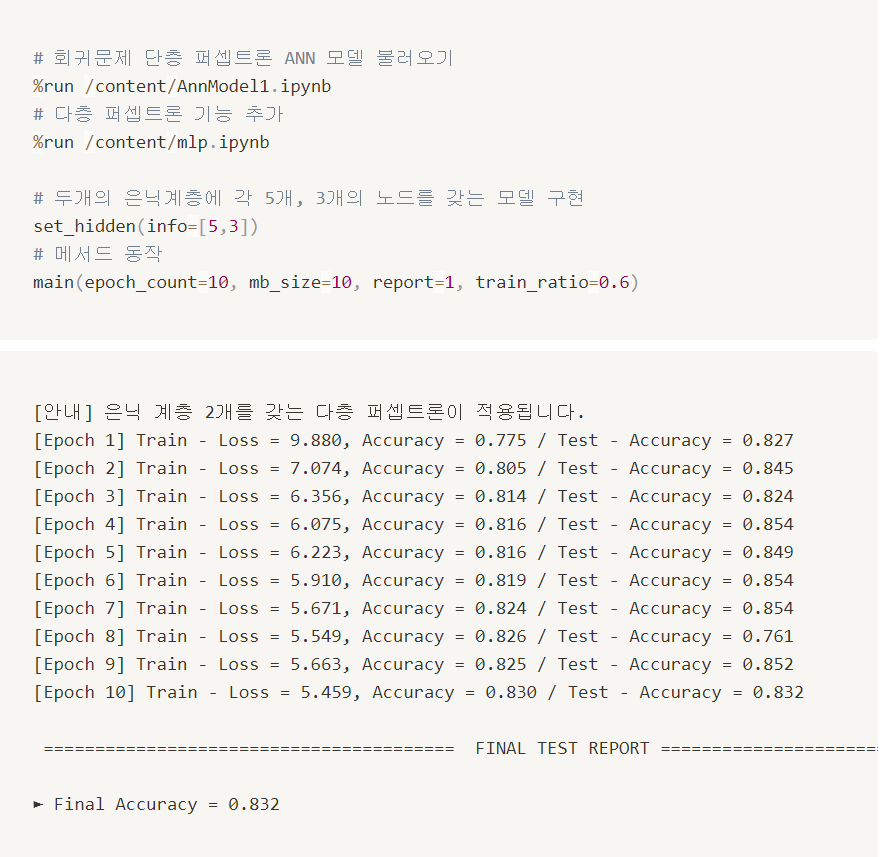


### **3-3. 종속 변수와 독립 변수들 간의 상관관계 확인**

In [8]:
corr = abalone.corr(method='pearson')
corr

<ipython-input-8-f3ac9c5c66ab>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = abalone.corr(method='pearson')


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


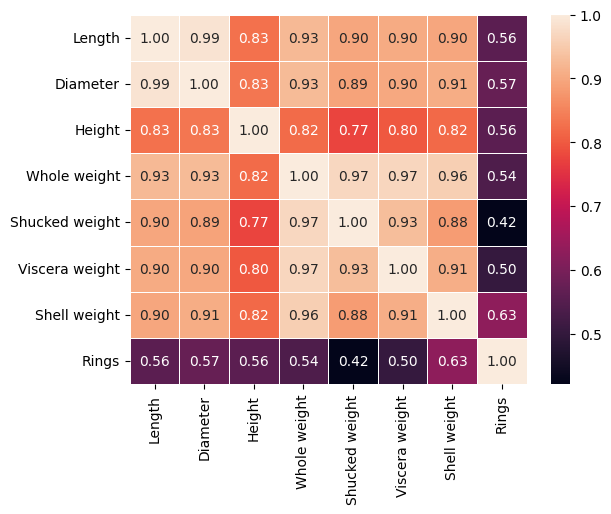

In [9]:
# plt.figure(figsize=(10,8), dpi =500)
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)
plt.show()

> 💡 **주요 독립 변수와 불필요한 독립 변수 확인**
-
<br>

> 💡 **종속 변수 예측에 필요한 독립 변수 적합성**
-
<br>

# **Part 4. ML 기법 및 데이터 양 적합성** <br>
### **4-1. ML 기법**<br>
> _다수의 독립변수를 제어할 수 있는 ML 기법_<br>

-
<br>

### **4-2. 데이터 양 적합성**<br>
- 데이터 양에 대한 명확하고 신뢰적인 기준은 없다.
- 상황, 목적 등에 따라서 필요한 데이터 양이 다르다.
- 또한 문제의 복잡도 및 학습 알고리즘의 복잡도에 따라서도 달라진다.
- 대체적으로 **_변수의 수에 100을 곱한 것보다 많은 양의 데이터_**가 필요하다.
- 머신러닝 및 딥러닝 분야에서는 데이터 개수가 많으면 많을수록 좋다.
- 데이터가 부족할 때에는 **_전이학습 (Transfer Learning)_**을 통해 보충할 수 있다.<br>
  - 데이터가 부족한 분야의 모델 구축을 위해 데이터가 풍부한 분야에서 훈련된 모델을 재사용하는 기법

<br>
[참고자료 1] 데이터 양에 대한 기준 : https://yozm.wishket.com/magazine/detail/1070/ <br>
[참고자료 2] 전이학습 : https://bibimnews.com/entry/%ED%95%99%EC%8A%B5%EB%8D%B0%EC%9D%B4%ED%84%B0-%EB%B6%80%EC%A1%B1%ED%98%84%EC%83%81-%ED%95%B4%EA%B2%B0%EB%B2%95-%EC%A0%84%EC%9D%B4%ED%95%99%EC%8A%B5Transfer-Learning


# **Part 5. 모델 향상을 위한 Actions** <br>
💡 **AI 모델 성능 고도화 (MLOps)**
- 데이터 엔지니어링
- 모델 엔지니어링
  + 최적화: 성능 향상
  + 경량화: 모델 추론의 실시간성
- 모델 배포
<br>

### **5-1. 단기적인 Actions** <br>
> 📌 **코드 리펙터링** <br>
- 활용할 라이브러리 결정
- 코드 간결화: 리스트컴프리헨션 및 파이썬 메서드 활용
<br>

> 📌 **데이터 엔지니어링** <br>
- 충분한 양의 데이터 확보 - 전이 학습법 활용?
- 타겟 데이터 불균형 확인 - 분포 확인
- 정보 누수 확인 - 상관관계 확인 결과, 누수 없음
<br>

>📌 **모델 엔지니어링** <br>
- Baseline
  + 에폭, 미니배치, 은닉계층 깊이와 노드 수
  + 편향 경사하강법 사용
- 고도화된 모델
  + 성능 **평가지표 기준** 세우기
  + **미니배치 경사하강법** (iteration마다 N개의 배치 사이즈 데이터를 사용한다)
  + 다변수의 기울기 계산할 때에, 경사하강법의 비용이 커지므로 비효율적이다. 따라서 **오차역전파법**을 사용한다.
  - 오차역전파법(backpropagation)은 경사하강법의 미분계산 대신 수열의 점화식을 사용한다.
<br>

> 📌 **UIUX 개선 - 모델 배포** <br>
- Web APP 구현: 데이터 입력 및 결과 출력 페이지
<br>

### **5-2. 장기적인 Actions** <br>
> - 모델 버전별로 수집된 데이터 관리
- 배포된 모델 관리 및 모니터링 자동화
<br>

<br>
[참고자료] "AI 서비스 상용화에 따른 운영 및 고도화 전략", 티멕스소프트 AI연구본부 정대범 본부장 칼럼(2021.11.11), https://dataonair.or.kr/db-tech-reference/d-lounge/expert-column/?mod=document&uid=239768

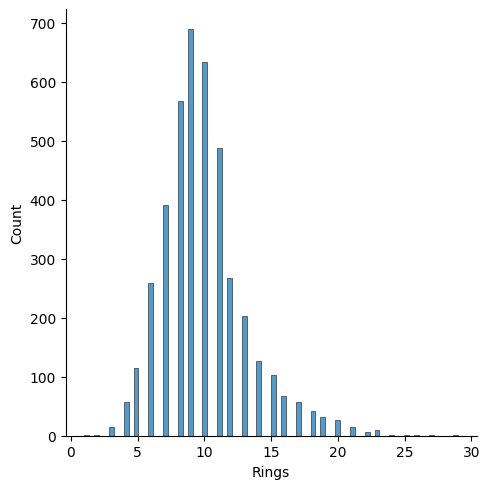

In [28]:
sns.displot(abalone['Rings']);

# **Part 6. 차후 해야 하는 To-do**
### 📌 _도메인 조사 결과 정리_
### 📌 _Baseline 코드 탐색 및 이해_
### 📌 _성능 고도화 작업_